In [1]:
# Importacion de bibliotecas
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Importacion de dataset interno
mnist = tf.keras.datasets.mnist # es un dataset de imagenes de 28X28 los que son numeros escritos a mano

In [4]:
# Construccion de modelo
(X_train, y_train), (X_test, y_test) = mnist.load_data()

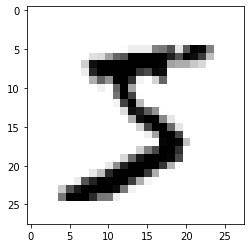

In [5]:
# Visualizacion de primeras imagenes
plt.imshow(X_train[0], cmap = plt.cm.binary)

Se puede ver como en la imagen se muestra un cinco escrito a mano, ahora hay que predecir cual es el numero que esta contenido en cada una de las imagenes.

In [6]:
# Viendo el tensor asociado a la primera observacion
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
# Normalizando dataset, ya que se encuentra en diferentes escalas.
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

In [8]:
# Comprobando reescalado de variables
# Recordar que la normalizacion reescala las variables entre 0 y 1
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
# Construyendo modelo
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) 

# se debe usar el flatten al final de las redes neuronales convulutivas para 
# ayudar al algortimo a aprender de forma mas facil

model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu)) # lineal, procesa mas rapido los resultados
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation= tf.nn.softmax)) # para alcanzar un suavizado en los resultados
model.compile(optimizer = 'adam', 
              loss ='sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [10]:
# Entrenando modelo
model.fit(X_train, y_train, epochs= 3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4551 - accuracy: 0.8719
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1084 - accuracy: 0.9678
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0666 - accuracy: 0.9794


Despues de 3 epochs se obtiene un accuracy de un 97.77% lo cual es bastante bueno, por lo que los resultados pueden predecir bien el numero escrito a mano.

In [11]:
# Calcular la perdida 
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0936 - accuracy: 0.9721
0.09359346330165863 0.972100019454956


La perdida esperada es de 9.35% y el accuracy es de un 97.21% lo que quire decir que las predicciones son bastante buenas, sin embargo puede tener overfitting.

In [12]:
# Guardando modelo 
model.save('num_reader.model')

INFO:tensorflow:Assets written to: num_reader.model/assets


In [13]:
new_model = tf.keras.models.load_model('num_reader.model')

In [14]:
# Creando predicciones
predictions = new_model.predict([X_test])

In [15]:
# Creando prediccion
import numpy as np
# Cambiando estructura de datos
print(np.argmax(predictions[0]))

7


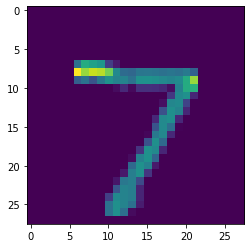

In [16]:
# Evaluando predicciones
plt.imshow(X_test[0])
plt.show()

Se puede ver que efectivamente la red convolutiva puede predecir el texto escrito a mano.

In [21]:
print(np.argmax(predictions[89]))

1


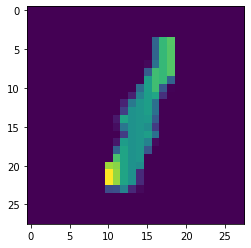

In [22]:
plt.imshow(X_test[89])
plt.show()